In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\AlejandroMoralesHell\OneDrive - Fundacion Universidad Empresa Murcia\Escritorio\KWS\VS19\CRM to CSV\SANDBOX\SANDBOX_Accounts.csv", low_memory=False)
df.describe

<bound method NDFrame.describe of     accountcategorycode  accountcategorycodename  accountclassificationcode  \
0                   NaN                      NaN                          1   

[42 rows x 272 columns]>

In [3]:
active_count = df[df['statuscodename'] == 'Active'].shape[0]
inactive_count = df[df['statuscodename'] == 'Inactive'].shape[0]

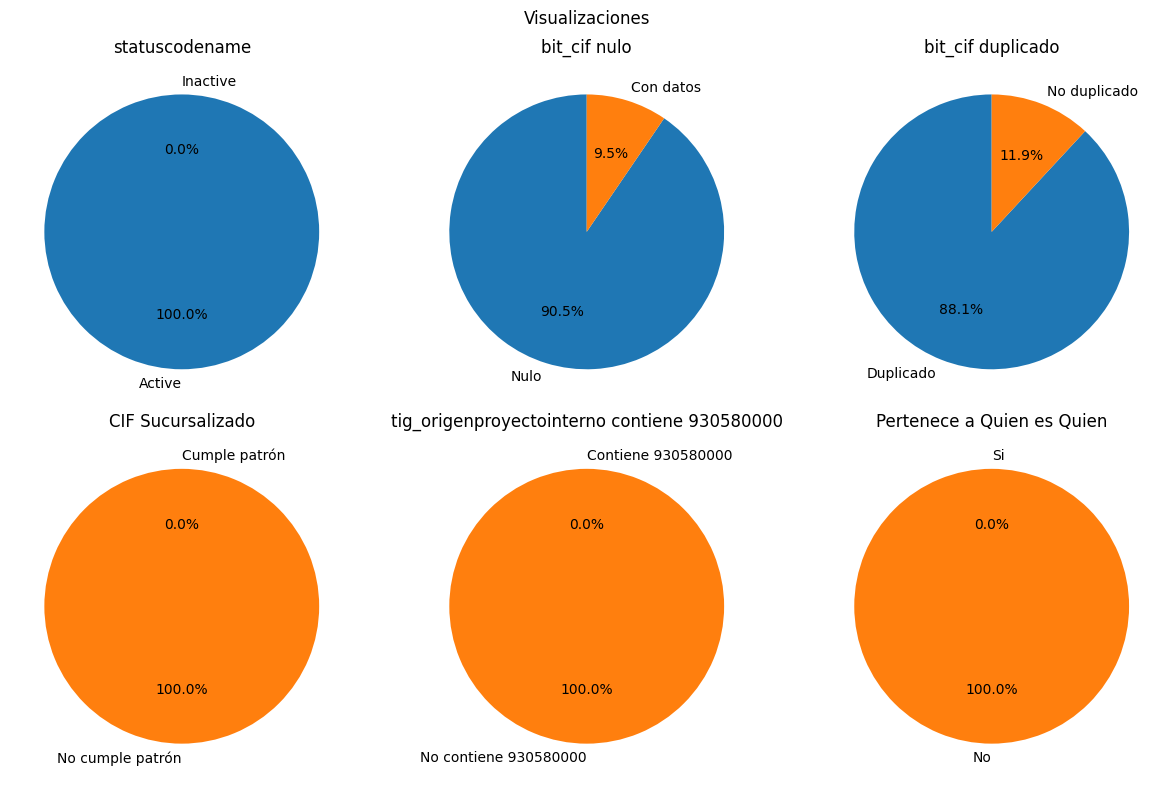

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\AlejandroMoralesHell\OneDrive - Fundacion Universidad Empresa Murcia\Escritorio\KWS\VS19\CRM to CSV\SANDBOX\SANDBOX_Accounts.csv", low_memory=False)

# Filtramos por Statuscodename
active_count = df[df['statuscodename'] == 'Active'].shape[0]
inactive_count = df[df['statuscodename'] == 'Inactive'].shape[0]
df_filtered = df[df['bit_cif'].notna()]


# Crear subplots para los pie charts
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Visualizaciones')

# Pie chart para Statuscodename
labels = ['Active', 'Inactive']
sizes = [active_count, inactive_count]
axs[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('statuscodename')

# Cuántas filas tienen bit_cif nulo
null_bit_cif_count = df['bit_cif'].isna().sum()
axs[0, 1].pie([null_bit_cif_count, len(df) - null_bit_cif_count], labels=['Nulo', 'Con datos'], autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('bit_cif nulo')

# Cuántas filas tienen bit_cif duplicado
duplicated_bit_cif_count = df[df.duplicated(subset=['bit_cif'])].shape[0]
axs[0, 2].pie([duplicated_bit_cif_count, len(df) - duplicated_bit_cif_count], labels=['Duplicado', 'No duplicado'], autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('bit_cif duplicado')

# Cuántas filas contienen '_s' seguido de hasta 3 dígitos en bit_cif

matching_rows = df_filtered[df_filtered['bit_cif'].str.contains("_S")].shape[0]
axs[1, 0].pie([matching_rows, len(df_filtered) - matching_rows], labels=['Cumple patrón', 'No cumple patrón'], autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('CIF Sucursalizado')

# Cuántas filas contienen el número 930580000 en tig_origenproyectointerno
matching_tig_rows = df_filtered[df_filtered['tig_origenproyectointerno'].astype(str).str.contains('930580000')].shape[0]
axs[1, 1].pie([matching_tig_rows, len(df_filtered) - matching_tig_rows], labels=['Contiene 930580000', 'No contiene 930580000'], autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('tig_origenproyectointerno contiene 930580000')

# Cuántas filas contienen el número 930580000 en tig_origenproyectointerno
matching_tig_rows = df_filtered[df_filtered['tig_origenproyectointerno'].astype(str).str.contains('930580000')].shape[0]
axs[1, 2].pie([matching_tig_rows, len(df_filtered) - matching_tig_rows], labels=['Si', 'No'], autopct='%1.1f%%', startangle=90)
axs[1, 2].set_title('Pertenece a Quien es Quien')

plt.tight_layout()
plt.show()


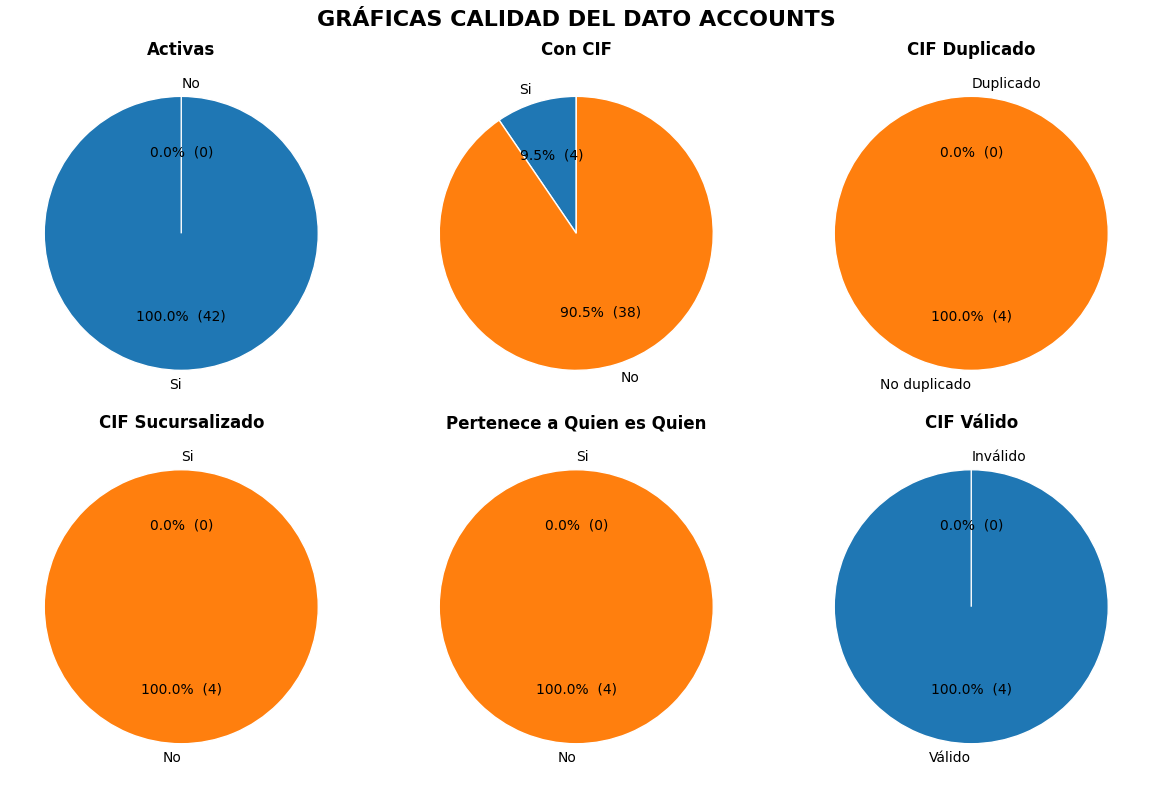

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re
# pd.options.mode.chained_assignment = None  # default='warn'


df = pd.read_csv(r"C:\Users\AlejandroMoralesHell\OneDrive - Fundacion Universidad Empresa Murcia\Escritorio\KWS\VS19\CRM to CSV\SANDBOX\SANDBOX_Accounts.csv", low_memory=False)
# Filtramos por Statuscodename
df_active = df[df['statuscodename'] == 'Active']
active_count = df_active.shape[0]
inactive_count = df[df['statuscodename'] == 'Inactive'].shape[0]

# Función para mostrar tanto el porcentaje como el número de filas
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Crear subplots para los pie charts
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('GRÁFICAS CALIDAD DEL DATO ACCOUNTS', fontsize=16, fontweight='bold')

# Pie chart para Statuscodename
labels = ['Si', 'No']
sizes = [active_count, inactive_count]
axs[0, 0].pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90,  wedgeprops=dict(edgecolor='white'), textprops={'color':"black"})
axs[0, 0].set_title('Activas', fontweight='bold')

#El resto de calculos lo hacemos sobre cuentas activas:
df = df_active.copy()
df_filtered = df[df['bit_cif'].notna()].copy()

# Cuántas filas tienen bit_cif nulo
null_bit_cif_count = df['bit_cif'].isna().sum()
axs[0, 1].pie([len(df) - null_bit_cif_count, null_bit_cif_count], labels=['Si', 'No'], autopct=make_autopct([len(df) - null_bit_cif_count, null_bit_cif_count] ), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[0, 1].set_title('Con CIF', fontweight='bold')

# Filtramos las filas con bit_cif duplicado
df_duplicated = df_filtered[df_filtered.duplicated(subset=['bit_cif'], keep=False)]
df_not_duplicated = df_filtered[~df_filtered['bit_cif'].isin(df_duplicated['bit_cif'])]
axs[0, 2].pie([len(df_duplicated), len(df_not_duplicated)], labels=['Duplicado', 'No duplicado'], autopct=make_autopct([len(df_duplicated), len(df_not_duplicated)]), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[0, 2].set_title('CIF Duplicado', fontweight='bold')

# Cuántas filas contienen '_s' seguido de hasta 3 dígitos en bit_cif
matching_rows = df_filtered[df_filtered['bit_cif'].str.contains("_S")].shape[0]
axs[1, 0].pie([matching_rows, len(df_filtered) - matching_rows], labels=['Si', 'No'], autopct=make_autopct([matching_rows, len(df_filtered) - matching_rows]), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[1, 0].set_title('CIF Sucursalizado', fontweight='bold')

# Cuántas filas contienen el número 930580000 en tig_origenproyectointerno
matching_tig_rows = df_filtered[df_filtered['tig_origenproyectointerno'].astype(str).str.contains('930580000')].shape[0]
axs[1, 1].pie([matching_tig_rows, len(df_filtered) - matching_tig_rows], labels=['Si', 'No'], autopct=make_autopct([matching_tig_rows, len(df_filtered) - matching_tig_rows]), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[1, 1].set_title('Pertenece a Quien es Quien', fontweight='bold')

#  VALIDACION CIF
# Expresión regular para validar CIFs con separadores opcionales
# regex = r"^[A-Za-z][- ]?[0-9]{7}[- ]?[0-9A-Ja]?(_S[0-9]{1,3})?$|^[0-9]{8}[A-Za-z](_S[0-9]{1,3})?$|^[X-Yx-y][- ]?[0-9]{7}[- ]?[A-Za-z]?$"

paises_regex = {
    # Grupo 1: 8 dígitos
    ("Guatemala", "Bolivia", "Laos", "Austria"): r"^[0-9]{8}(_S[0-9]{1,3})?$",

    # Grupo 2: 9 dígitos
    ("Estados Unidos", "Países Bajos", "Portugal", "República Dominicana", "Nicaragua", "Austria"): r"^[0-9]{9}(_S[0-9]{1,3})?$",

    # Grupo 3: 11 dígitos
    ("Perú", "Italia", "Bélgica", "Noruega", "Finlandia"): r"^[0-9]{11}(_S[0-9]{1,3})?$",

    # Grupo 4: 12 dígitos
    ("Ecuador", "Venezuela", "Uruguay", "Costa Rica"): r"^[0-9]{12}(_S[0-9]{1,3})?$",

    # Grupo 5: 13 dígitos
    ("Francia", "México", "Panamá"): r"^[0-9]{13}(_S[0-9]{1,3})?$",

    # Grupo 6: 14 dígitos
    ("Brasil", "Honduras", "El Salvador", "Nicaragua"): r"^[0-9]{14}(_S[0-9]{1,3})?$",

    # Grupo 7: 8 dígitos y una letra
    ("Irlanda"): r"^[0-9]{8}[A-Za-z](_S[0-9]{1,3})?$",

    # Grupo 8: España (CIF y NIF). Se aplica esta RE para bit_pais null
    ("España", "Prueba Pais"): r"^[A-Za-z][- ]?[0-9]{7}[- ]?[0-9A-Ja]?(_S[0-9]{1,3})?$|^[0-9]{8}[A-Za-z]?(_S[0-9]{1,3})?$|^[X-Yx-y][- ]?[0-9]{7}[- ]?[A-Za-z]?(_S[0-9]{1,3})?$",

    # Grupo 9: CIFs con formato variable
    ("Alemania"): r"^[0-9]{1,3}[/]?[0-9]{3}[/]?[0-9]{7}$",

    # Grupo 10: Casos especiales
    ("Argentina"): r"^[0-9]{2}-[0-9]{8}-[0-9]{1}$",
    ("Reino Unido"): r"^[A-Z]{2}[0-9]{6}[A-Z]$",
}

def obtener_regex(codigo_pais):
    if pd.isna(codigo_pais):
        codigo_pais = "España"
    for paises, regex in paises_regex.items():
        if codigo_pais in paises:
            return regex
        else:
            codigo_pais = "España"
            if codigo_pais in paises:
                return regex

# Aplica la función a cada fila
df_filtered['regex'] = df_filtered['bit_paisname'].apply(obtener_regex)
df_filtered['valid_cif'] = df_filtered.apply(lambda row: bool(re.match(row['regex'], row['bit_cif'])), axis=1)
# Contar los CIFs válidos e inválidos
valid_cif_count = df_filtered['valid_cif'].sum()
invalid_cif_count = len(df_filtered) - valid_cif_count
axs[1, 2].pie([valid_cif_count, invalid_cif_count], labels=['Válido', 'Inválido'], autopct=make_autopct([valid_cif_count, invalid_cif_count]), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[1, 2].set_title('CIF Válido', fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
df_filtered.to_csv("Accs-Active-wthCif-valid.csv", index= False)

In [5]:
# Graficos completos:
# Duplicados de cuentas de Quien es Quien:
'''
# Cuántas filas contienen el número 930580000 en tig_origenproyectointerno
# Filtramos las cuentas que pertenecen a "Quien es Quien"
df_quien_es_quien = df_filtered[df_filtered['tig_origenproyectointerno'].astype(str).str.contains('930580000')]

# Obtenemos los bit_cif que están en "Quien es Quien"
cif_in_quien_es_quien = df_quien_es_quien['bit_cif'].unique()

# Filtramos las cuentas que no pertenecen a "Quien es Quien"
df_not_quien_es_quien = df_filtered[~df_filtered['tig_origenproyectointerno'].astype(str).str.contains('930580000')]

# Obtenemos las cuentas que no pertenecen a "Quien es Quien" pero tienen un bit_cif que está en "Quien es Quien"
df_not_quien_es_quien_duplicated = df_not_quien_es_quien[df_not_quien_es_quien['bit_cif'].isin(cif_in_quien_es_quien)]

# Obtenemos las cuentas de "Quien es Quien" que tienen un bit_cif duplicado en las cuentas que no pertenecen a "Quien es Quien"
df_quien_es_quien_duplicated = df_quien_es_quien[df_quien_es_quien['bit_cif'].isin(df_not_quien_es_quien_duplicated['bit_cif'].unique())]

# Ahora podemos hacer el gráfico de pastel

axs[1, 2].pie([len(df_quien_es_quien_duplicated), len(df_not_quien_es_quien_duplicated)], labels=['QeQ con duplicados', 'Duplicados (No QeQ)'], autopct=make_autopct([len(df_quien_es_quien_duplicated), len(df_not_quien_es_quien_duplicated)]), startangle=90,  wedgeprops=dict(edgecolor='white'))
axs[1, 2].set_title('Duplicados con Quien es Quien', fontweight='bold')
'''

'\n# Cuántas filas contienen el número 930580000 en tig_origenproyectointerno\n# Filtramos las cuentas que pertenecen a "Quien es Quien"\ndf_quien_es_quien = df_filtered[df_filtered[\'tig_origenproyectointerno\'].astype(str).str.contains(\'930580000\')]\n\n# Obtenemos los bit_cif que están en "Quien es Quien"\ncif_in_quien_es_quien = df_quien_es_quien[\'bit_cif\'].unique()\n\n# Filtramos las cuentas que no pertenecen a "Quien es Quien"\ndf_not_quien_es_quien = df_filtered[~df_filtered[\'tig_origenproyectointerno\'].astype(str).str.contains(\'930580000\')]\n\n# Obtenemos las cuentas que no pertenecen a "Quien es Quien" pero tienen un bit_cif que está en "Quien es Quien"\ndf_not_quien_es_quien_duplicated = df_not_quien_es_quien[df_not_quien_es_quien[\'bit_cif\'].isin(cif_in_quien_es_quien)]\n\n# Obtenemos las cuentas de "Quien es Quien" que tienen un bit_cif duplicado en las cuentas que no pertenecen a "Quien es Quien"\ndf_quien_es_quien_duplicated = df_quien_es_quien[df_quien_es_quien[\

In [ ]:
# Diccionario CleanScore
conditions_scores = {
    "modifiedon > pd.Timestamp('2023-01-01')": 3,
    "bit_idsede_lotus.notna()": 0,
    "telephone1.notna()": 1,
    "bit_sectoractividad.notna()": 3,
    "websiteurl.notna()": 1,
    "bit_cnae.notna()": 1,
    "emailaddress1.notna()": 1,
    "_bit_municipio_value.notna()": 1,
    "revenue.notna()": 1,
    "address1_line1.notna()": 2,
    "address1_postalcode.notna()": 2,
    "tig_origenproyectointerno.notna() or bit_customerjourneyorigen.notna()" : 100,
    
    
}

In [10]:
null_bit_cif_count = df['bit_cif'].isnull().sum()
print(f"Filas con bit_cif nulo: {null_bit_cif_count}")


Filas con bit_cif nulo: 38


In [2]:
df_quien_es_quien_duplicated.to_csv("QeQconDuplicados_2.csv")
df_not_quien_es_quien_duplicated.to_csv("DuplicadosQeQ_2.csv")